## Data Science Assignment - 1.C

Submitted By : Subrat Nanda

c. Create a multi class classifier using logistic regression:

* i. Logistic regression is a binary classifier, to use it as multi class classifier, we have two approaches - "one vs one" and "one vs all".
* ii. Understand both approaches and implement both approaches.
* iii. Compare confusion matrix and accuracy and provide a conclusion on which
approach is better.

d. Use various metrics like accuracy, precision, recall etc. to evaluate the model.

### Take MINST dataset. Implement Logistic regression to predict number from Handwritten digits.

#### 1.Import necessary libraries and modules.

In [26]:
# Import Necessary Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import keras.utils
from keras import utils as np_utils
from keras import backend as K
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler


#### 2.Load the MNIST dataset.

Split the dataset into training and testing sets.

In [10]:
#  to split the data of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 3.Preprocess the data by normalizing and flattening the images.

Dimension of the training data is (60000*28*28).

In [11]:
# Preprocessing the data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Feature Normalization
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
# Convert labels to One Hot Encoded
# num_digits = 10
# y_train = keras.utils.to_categorical(y_train, num_digits)
# y_test = keras.utils.to_categorical(y_test, num_digits)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
# Display size of train and test x

print('Shape of Train Image : ',x_train.shape)
print('Shape of Test Image : ',x_test.shape)
print("Length of Train = ",str(len(x_train)))
print("Length of Test = ",str(len(x_test)))

Shape of Train Image :  (60000, 784)
Shape of Test Image :  (10000, 784)
Length of Train =  60000
Length of Test =  10000


In [16]:
# Display size of train and test y

print('Shape of Train Image : ',y_train.shape)
print('Shape of Test Image : ',y_test.shape)
print("Length of Train = ",str(len(y_train)))
print("Length of Test = ",str(len(y_test)))

Shape of Train Image :  (60000,)
Shape of Test Image :  (10000,)
Length of Train =  60000
Length of Test =  10000


#### 4.Displaying the data.

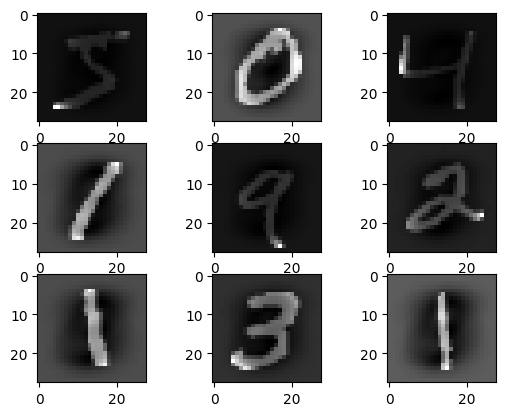

In [17]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

**One vs One Approach**: In the one vs one approach, we train a binary classifier for each pair of classes. For example, if we have 10 classes (0 to 9), we would train 45 binary classifiers (10 choose 2). During prediction, we use a voting scheme to determine the final class.


In [21]:
# Implementing logistic regression using the "one vs one" approach
# Training the model

model_one_vs_one = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
model_one_vs_one.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [22]:
# Predicting the numbers using the "one vs one" model
y_pred_one_vs_one = model_one_vs_one.predict(x_test)

In [23]:
# Implementing logistic regression using the "one vs all" approach
# Training the model

model_one_vs_all = LogisticRegression(multi_class='ovr', solver='lbfgs',max_iter=1000)
model_one_vs_all.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [24]:
# Predicting the numbers using the "one vs all" model
y_pred_one_vs_all = model_one_vs_all.predict(x_test)

In [27]:
# Evaluating the "one vs one" model
confusion_matrix_one_vs_one = confusion_matrix(y_test, y_pred_one_vs_one)
accuracy_one_vs_one = accuracy_score(y_test, y_pred_one_vs_one)
precision_one_vs_one = precision_score(y_test, y_pred_one_vs_one, average='weighted')
recall_one_vs_one = recall_score(y_test, y_pred_one_vs_one, average='weighted')

In [28]:
# Evaluating the "one vs all" model
confusion_matrix_one_vs_all = confusion_matrix(y_test, y_pred_one_vs_all)
accuracy_one_vs_all = accuracy_score(y_test, y_pred_one_vs_all)
precision_one_vs_all = precision_score(y_test, y_pred_one_vs_all, average='weighted')
recall_one_vs_all = recall_score(y_test, y_pred_one_vs_all, average='weighted')

In [33]:
# Printing the evaluation metrics for both models
print("Confusion Matrix:")
print(confusion_matrix_one_vs_one)

Confusion Matrix:
[[ 932    0    4    3    0   15   20    2    4    0]
 [   0 1106    3    4    0    1    4    0   17    0]
 [  18   38  830   29   20    0   29   22   45    1]
 [   3   22   25  877    2   15    9   21   27    9]
 [   1   19    5    0  885    1   13    2    8   48]
 [  12   34    6   88   21  654   19   14   25   19]
 [  16   15   10    0   13   18  882    0    4    0]
 [   2   50   14    6   12    0    1  893    6   44]
 [  12   53    8   47   16   32   10   11  765   20]
 [  16   19    6   14   54    2    0   48    3  847]]


In [36]:
pd.crosstab(y_test, y_pred_one_vs_one, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,932,0,4,3,0,15,20,2,4,0,980
1,0,1106,3,4,0,1,4,0,17,0,1135
2,18,38,830,29,20,0,29,22,45,1,1032
3,3,22,25,877,2,15,9,21,27,9,1010
4,1,19,5,0,885,1,13,2,8,48,982
5,12,34,6,88,21,654,19,14,25,19,892
6,16,15,10,0,13,18,882,0,4,0,958
7,2,50,14,6,12,0,1,893,6,44,1028
8,12,53,8,47,16,32,10,11,765,20,974


In [34]:
print("Evaluation Metrics for One vs One Approach:")
print("Accuracy:", accuracy_one_vs_one)
print("Precision:", precision_one_vs_one)
print("Recall:", recall_one_vs_one)

Evaluation Metrics for One vs One Approach:
Accuracy: 0.8671
Precision: 0.8689438938759997
Recall: 0.8671


In [35]:
# Printing the evaluation metrics for both models
print("Confusion Matrix:")
print(confusion_matrix_one_vs_all)

Confusion Matrix:
[[ 933    1    1    5    0   11   21    2    6    0]
 [   0 1108    3    4    0    1    4    0   15    0]
 [  20   53  813   31   19    0   31   21   43    1]
 [   3   28   27  877    1    8    9   23   25    9]
 [   1   27    5    0  881    1   12    3    7   45]
 [  17   42    7  114   25  603   21   16   27   20]
 [  20   18    8    0   16   17  877    0    2    0]
 [   2   58   11    5   11    0    1  899    6   35]
 [  15   66    7   53   15   33   10   14  743   18]
 [  20   25    6   16   58    1    0   57    5  821]]


In [37]:
pd.crosstab(y_test, y_pred_one_vs_all, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,933,1,1,5,0,11,21,2,6,0,980
1,0,1108,3,4,0,1,4,0,15,0,1135
2,20,53,813,31,19,0,31,21,43,1,1032
3,3,28,27,877,1,8,9,23,25,9,1010
4,1,27,5,0,881,1,12,3,7,45,982
5,17,42,7,114,25,603,21,16,27,20,892
6,20,18,8,0,16,17,877,0,2,0,958
7,2,58,11,5,11,0,1,899,6,35,1028
8,15,66,7,53,15,33,10,14,743,18,974


In [32]:
print("Evaluation Metrics for One vs One Approach:")
print("Accuracy:", accuracy_one_vs_all)
print("Precision:", precision_one_vs_all)
print("Recall:", recall_one_vs_all)

Evaluation Metrics for One vs One Approach:
Accuracy: 0.8555
Precision: 0.8596476324720482
Recall: 0.8555


Between One VS One (OVO) and One VS All (OVA), both approaches have their own strengths and weaknesses, and the choice between the two depends on the specific problem at hand.

* One VS One (OVO) approach trains a binary classifier for every pair of classes in the dataset. For example, if there are five classes, then OVO would train 10 binary classifiers (class 1 vs class 2, class 1 vs class 3, class 1 vs class 4, ..., class 4 vs class 5).
* During prediction, each binary classifier would make a prediction, and the class with the most votes would be selected as the final prediction.

* On the other hand, One VS All (OVA) approach trains a single binary classifier for each class in the dataset. For example, if there are five classes, then OVA would train five binary classifiers (class 1 vs not class 1, class 2 vs not class 2, ..., class 5 vs not class 5).

* During prediction, each binary classifier would make a prediction, and the class with the highest probability would be selected as the final prediction.


In general, OVA is a more popular approach because it is computationally less expensive than OVO. OVA also tends to work better when there is a large number of classes in the dataset. However, OVO can be more accurate when there is not enough data available for each class.

For example, let's say we have a dataset with three classes: cats, dogs, and birds. If we use OVO approach, we would have to train three binary classifiers: cat vs dog, cat vs bird, and dog vs bird. On the other hand, if we use OVA approach, we would train three binary classifiers: cat vs not cat, dog vs not dog, and bird vs not bird.

In conclusion, both OVO and OVA approaches have their own strengths and weaknesses. The choice between the two depends on the specific problem at hand.